# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
# Fijamos el parámetro RANDOM_STATE
RANDOM_STATE = 333

# Parte 2: Clasificación

__Número de grupo: 15__

__Nombres de los estudiantes:__
- Daniela Alejanda Córdova
- David Bugoi
- Erik Karlgren Domercq

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flouroscopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

# 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [2]:
import pandas as pd

df = pd.read_csv (r'cleveland.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
# Cambiamos las variables codificadas a números indicando que son categóricas 
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

In [4]:
# Cambiamos valores de la columna target a normal si es 0 y a enfermo si es 1-4
df.loc[df['target'] !=0, 'target'] = "enfermo"
df.loc[df['target'] ==0, 'target'] = "normal"

# Eliminamos filas que le faltan valores:
df = df.dropna()       
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


# 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

### Equilibrio

In [5]:
df['target'].value_counts()

normal     160
enfermo    137
Name: target, dtype: int64

Las personas 'normales' o sin enfermedad son el 53.8% del conjunto de datos y los enfermos son el 46.2%, así que están ranozablemente equilibradas las dos clases.

Si estuvieran muy desequlibradas, la tasa de aciertos podría presentar problemas. Ya que si sólo tuvieramos 1% de enfermos y el resto (99%) fueran normales, entonces un clasificador podría predecir ingenuamente, tratando de maximizar los aciertos totales (accuracy), que ninguna persona está enferma. Analizando esto más de cerca podríamos observar que este modelo no está bien simplemente por la falta de datos y por ello predice erróneamente.

En este caso, tenemos casi el conjunto de datos partido mitad-mitad entre enfermos y normales, luego no hay problema de desbalance.

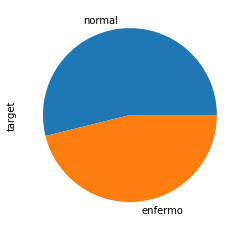

In [6]:
df['target'].value_counts().plot.pie()

## Análisis de las variables numéricas

In [7]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


El rango varía en cada una de las variables númericas anteriores. En una solo hay una diferencia de 3 entre el mínimo y el máximo (0-3, `ca`), mientras que en otra es mucho más grande (126 - 564, `chol`).
En el caso de la desviación estándar, los valores en `ca` están mucho más cercanos y tiene sentido por su rango, y lo mismo ocurre con `chol` que es la variable con mayor std. 

Dependiendo del tipo de técnica a aplicar, estos datos nos informarían de si es necesario normalizar o estandarizar los datos. En esta práctica no es necesario y se explicará más adelante.

### Age:

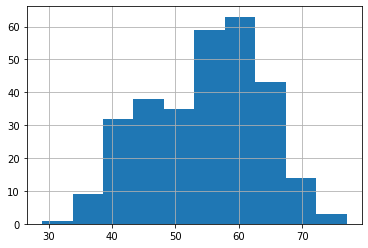

In [8]:
df['age'].hist();

Tenemos un buen conjunto de datos para la población entre los 35 y los 70 años, por los cuál las técnicas de aprendizaje automático trabajarán bien sobre este conjunto de datos.

El problema es que tenemos muy pocas personas alrededor de los 30 años, causando que no podamos predecir bien alrededor de esta edad; aunque podríamos pensar que personas a sus 30 sufriendo enfermedades cardiovasculares no es un grupo numeroso, podría ser mejor obtener unos cuántos datos para evitar clasificar erróneamente a las personas de esta edad. También nos faltan datos para las personas mayores de 70 años, y siendo este un grupo más propenso a enfermar que otros podríamos tener problemas aún más graves en nuestras predicciones.

### Trestbps:

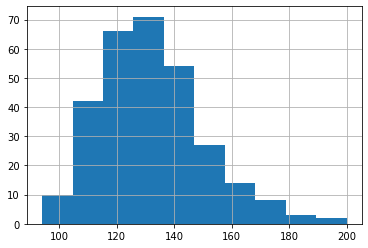

In [9]:
df['trestbps'].hist();

Tenemos un buen conjunto datos en general para esta variable, aunque tenemos pocos valores para presiones de 180 a 200 mmHg.

### Chol:

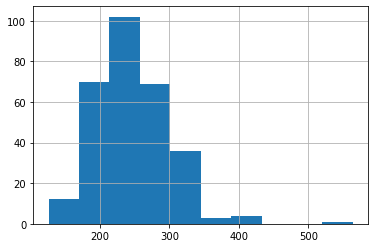

In [10]:
df['chol'].hist();

Mirando la distribución estandar y los cuartiles, se puede observar que entre el min y el 25% hay un salto, quizás no tan grande pero luego el 25%, 50% y 75% representan valores muy cercanos entre sí, es decir, la gran mayoría de los valores están entre 211 y 276. Finalmente, el mayor salto es hacia el máximo que es 564. Esto quiere decir, que existe quizas un gran hueco sin datos representandos, lo que podría causar problemas a la hora de usar las técnicas del aprendizaje automático para dividir bien entre las dos clases. Podemos ver esto claramente en la gráfica anterior.

### Thalach:

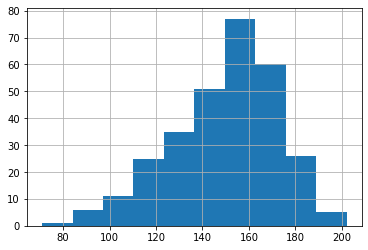

In [11]:
df['thalach'].hist();

In [12]:
df.loc[df['thalach']<=80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
245,67.0,1.0,4.0,120.0,237.0,0.0,0.0,71.0,0.0,1.0,2.0,0.0,3.0,enfermo


Tenemos un buen conjunto datos en general para esta variable, pues el rango desde 85 hasta 200 ppm (pulsaciones por minuto) tiene una gran cantidad de datos. Quizás los individuos con tasa cardíaca máxima de 80 ppm o menos podrían causar problemas al ser categorizados porque podrían ser clasificados todos estos como enfermos cuando no lo son tomando en cuenta lo que significa esta variable. La persona podría estar sana con una baja tasa cardíaca.

### Oldpeak:

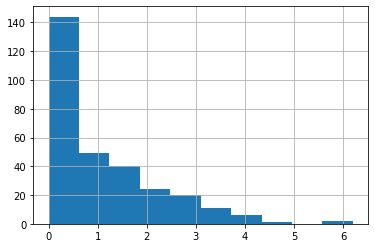

In [13]:
df['oldpeak'].hist();

In [14]:
df.loc[df['oldpeak']>=5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
91,62.0,0.0,4.0,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0,enfermo
123,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,enfermo


Esta variable si representa una gran problemática ya que tenemos solo 2 datos con valores por encima de 5 e incluso en ese rango habrán valores que ni si quiera tienen datos. Esto podría causar problemas en la clasificación si no está enferma la persona.

### Ca:

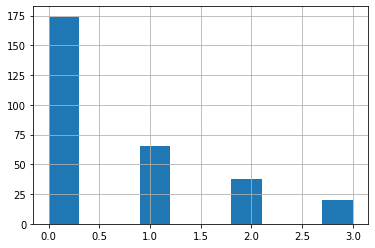

In [15]:
df['ca'].hist();

Para `ca` si tenemos una buena cantidad de datos ya que sólo puede tomar valores enteros entre 0 y 3.

## Estudio de las relaciones

In [16]:
# Correlaciones par a par
corr = df.corr(method='pearson')
corr

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


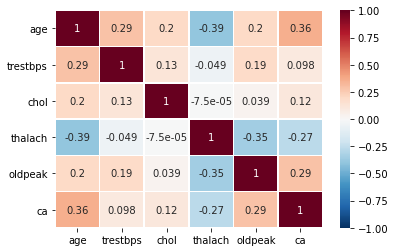

In [47]:
import seaborn as sns

# Con esto podemos ver mejor las correlaciones
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            vmin=-1.0,
            vmax=1.0)

Como el coeficiente de relación de Pearson estudia el grado de relación de 2 variables y tomando en cuenta lo siguiente:

Todas aquellas con valor menor a 0 (<0) y cercano a -1, están relacionadas en sentido inverso: cuanto mayor sea el valor de una, menor el de la otra. Si es mayor a 0 (>0) y cercano a 1 la relacion es directa e implica que si una aumenta la otra tambien en cierta cantidad. Ahora si es más cercano a 0, indica que no hay relacion lineal entre las dos variables.

Podemos observar que muchas de las correlaciones son positivas pero por lo general no precisamente fuertes (varias no llegan siquiera a 0.3), mientras que las correlaciones negativas son algo más fuertes (-0.27, -0.35 y -0.39).

- **Correlaciones directas:** age-trestbps, age-chol, age-oldpeak, age-ca, trestbps-chol, trestbps-oldpeak, chol-ca, oldpeak-ca
- **Correlaciones inversas:** age-thalach, thalach-oldpeak, thalach-ca
- **Sin relacion:** chol-thalach
- **Discutibles si tienen o no relación lineal:** trestbps-ca, trestbps-thalach, chol-oldpeak.

Podemos concluir entonces, por ejemplo, que las que tienen un nivel de correlacion moderado son age-thalach, age-ca y otras que esten entre 0.3 y 0.5, luego:
- Age-ca = 0.36, indicaría que en un cierto grado de relación a mayor edad tiene una persona, mayor número de vasos sanguíneos principales son coloreados. Y así para el resto de las variables relacionadas directamente
- Age-thalach = -0.39, podemos indicar que con un cierto grado de relación, a mayor edad tenga una persona, menor será la frecuencia cardíaca máxima alcanzada. Y así ocurre con el resto de las relacionadas inversamente.
- Finalmente, en el caso de trestbps-ca, la presión arterial en reposo no tiene ninguna relación lineal con el mayor número de vasos coloreados.

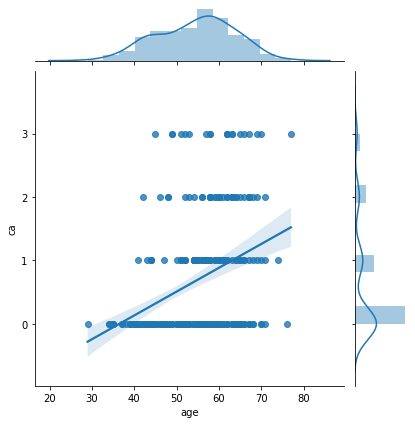

In [18]:
from scipy.stats import pearsonr
sns.jointplot(x='age', y='ca', data=df, kind='reg')

En esta gráfica se puede observar la relación directa que se mencionó anteriormente. La concentración de datos se traslada ligeramente a la derecha a mayor edad que tiene la persona y mayor `ca` tiene. 

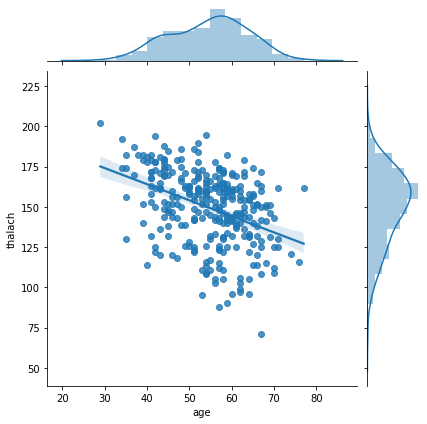

In [19]:
sns.jointplot(x='age', y='thalach', data=df, kind='reg')

En esta gráfica se puede observar la relación inversa que existe. A medida que se avanza en la edad, los datos tienden a tener asignado una menor frecuencia cardiaca máxima. 

In [20]:
dfPintar = df.select_dtypes(exclude=['category'])

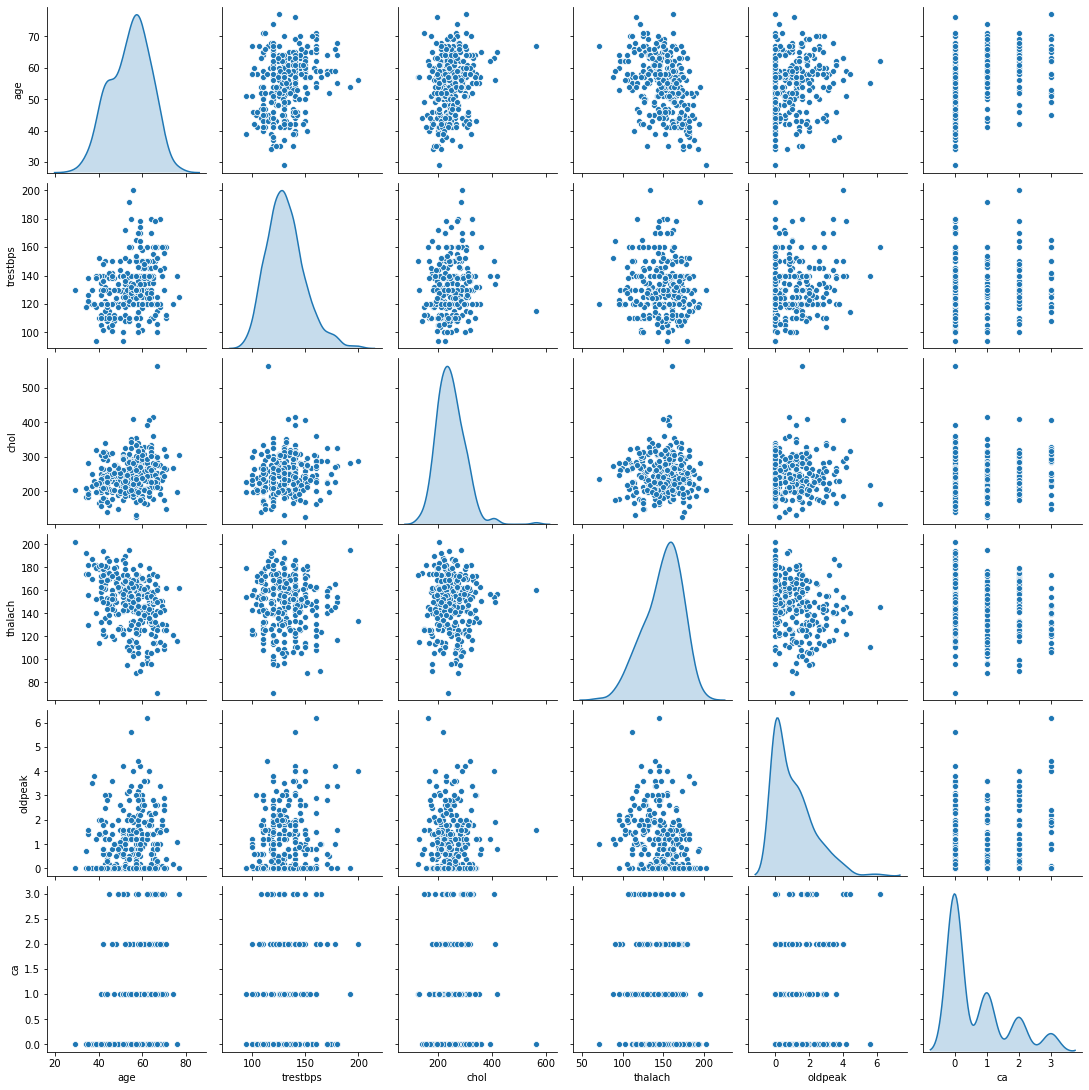

In [21]:
import seaborn as sns
# Gráficas par a par
sns.pairplot(dfPintar, diag_kind='kde')

##### Resumen:
Luego, en definitiva, las variables que mejor separan son `age-ca` y `age-thalach` aunque lo hagan con un grado de correlación moderado. El resto de las variables, menos `trestbps-ca` y `oldpeak-thalach`, tiene un grado de correlación bastante más pequeño.

Esto quiere decir, que a pesar de que va a poder diferenciar a las personas enfermas de las normales, necesitará trabajar un poco, pero no es imposible su resolución. Sólo unas pocas relaciones par a par no tiene una relación remotamente lineal entre sí.

Al tener unas etiquetas y querer entrenar al computador para que encuentre diferentes patrones, como son una gran cantidad de variables relacionadas y un buen conjunto de datos, creemos que sí podrá clasificar entre estos dos grupos

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Al ser un problema que se resolverá usando un árbol de desición, no es necesario normalizar ni estadarizas los datos ya que esto no se toma en cuenta al crear las ramas del árbol.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [22]:
# Creamos una copia del dataframe original, eliminamos la columna target y lo convertimos a un array para poder utilizar
# los datos más adelante
X1 = df.copy()
X1 = X1.drop(['target'], axis=1)
# Guardamos los nombres de las columnas si target
nombre_columnas = X1.columns.values
X1 = X1.to_numpy()
X1

array([[63.0, 1.0, 1.0, ..., 3.0, 0.0, 6.0],
       [67.0, 1.0, 4.0, ..., 2.0, 3.0, 3.0],
       [67.0, 1.0, 4.0, ..., 2.0, 2.0, 7.0],
       ...,
       [68.0, 1.0, 4.0, ..., 2.0, 2.0, 7.0],
       [57.0, 1.0, 4.0, ..., 2.0, 1.0, 7.0],
       [57.0, 0.0, 2.0, ..., 2.0, 1.0, 3.0]], dtype=object)

In [23]:
nombre_columnas

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [24]:
# Convertimos la columna target en un array
X2 = df.target
X2 = X2.to_numpy()

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier( criterion='entropy', random_state=RANDOM_STATE)
# Como en un árbol de decisión no hace falta escalar variables, dan igual las distancias
clf = clf.fit(X1, X2)

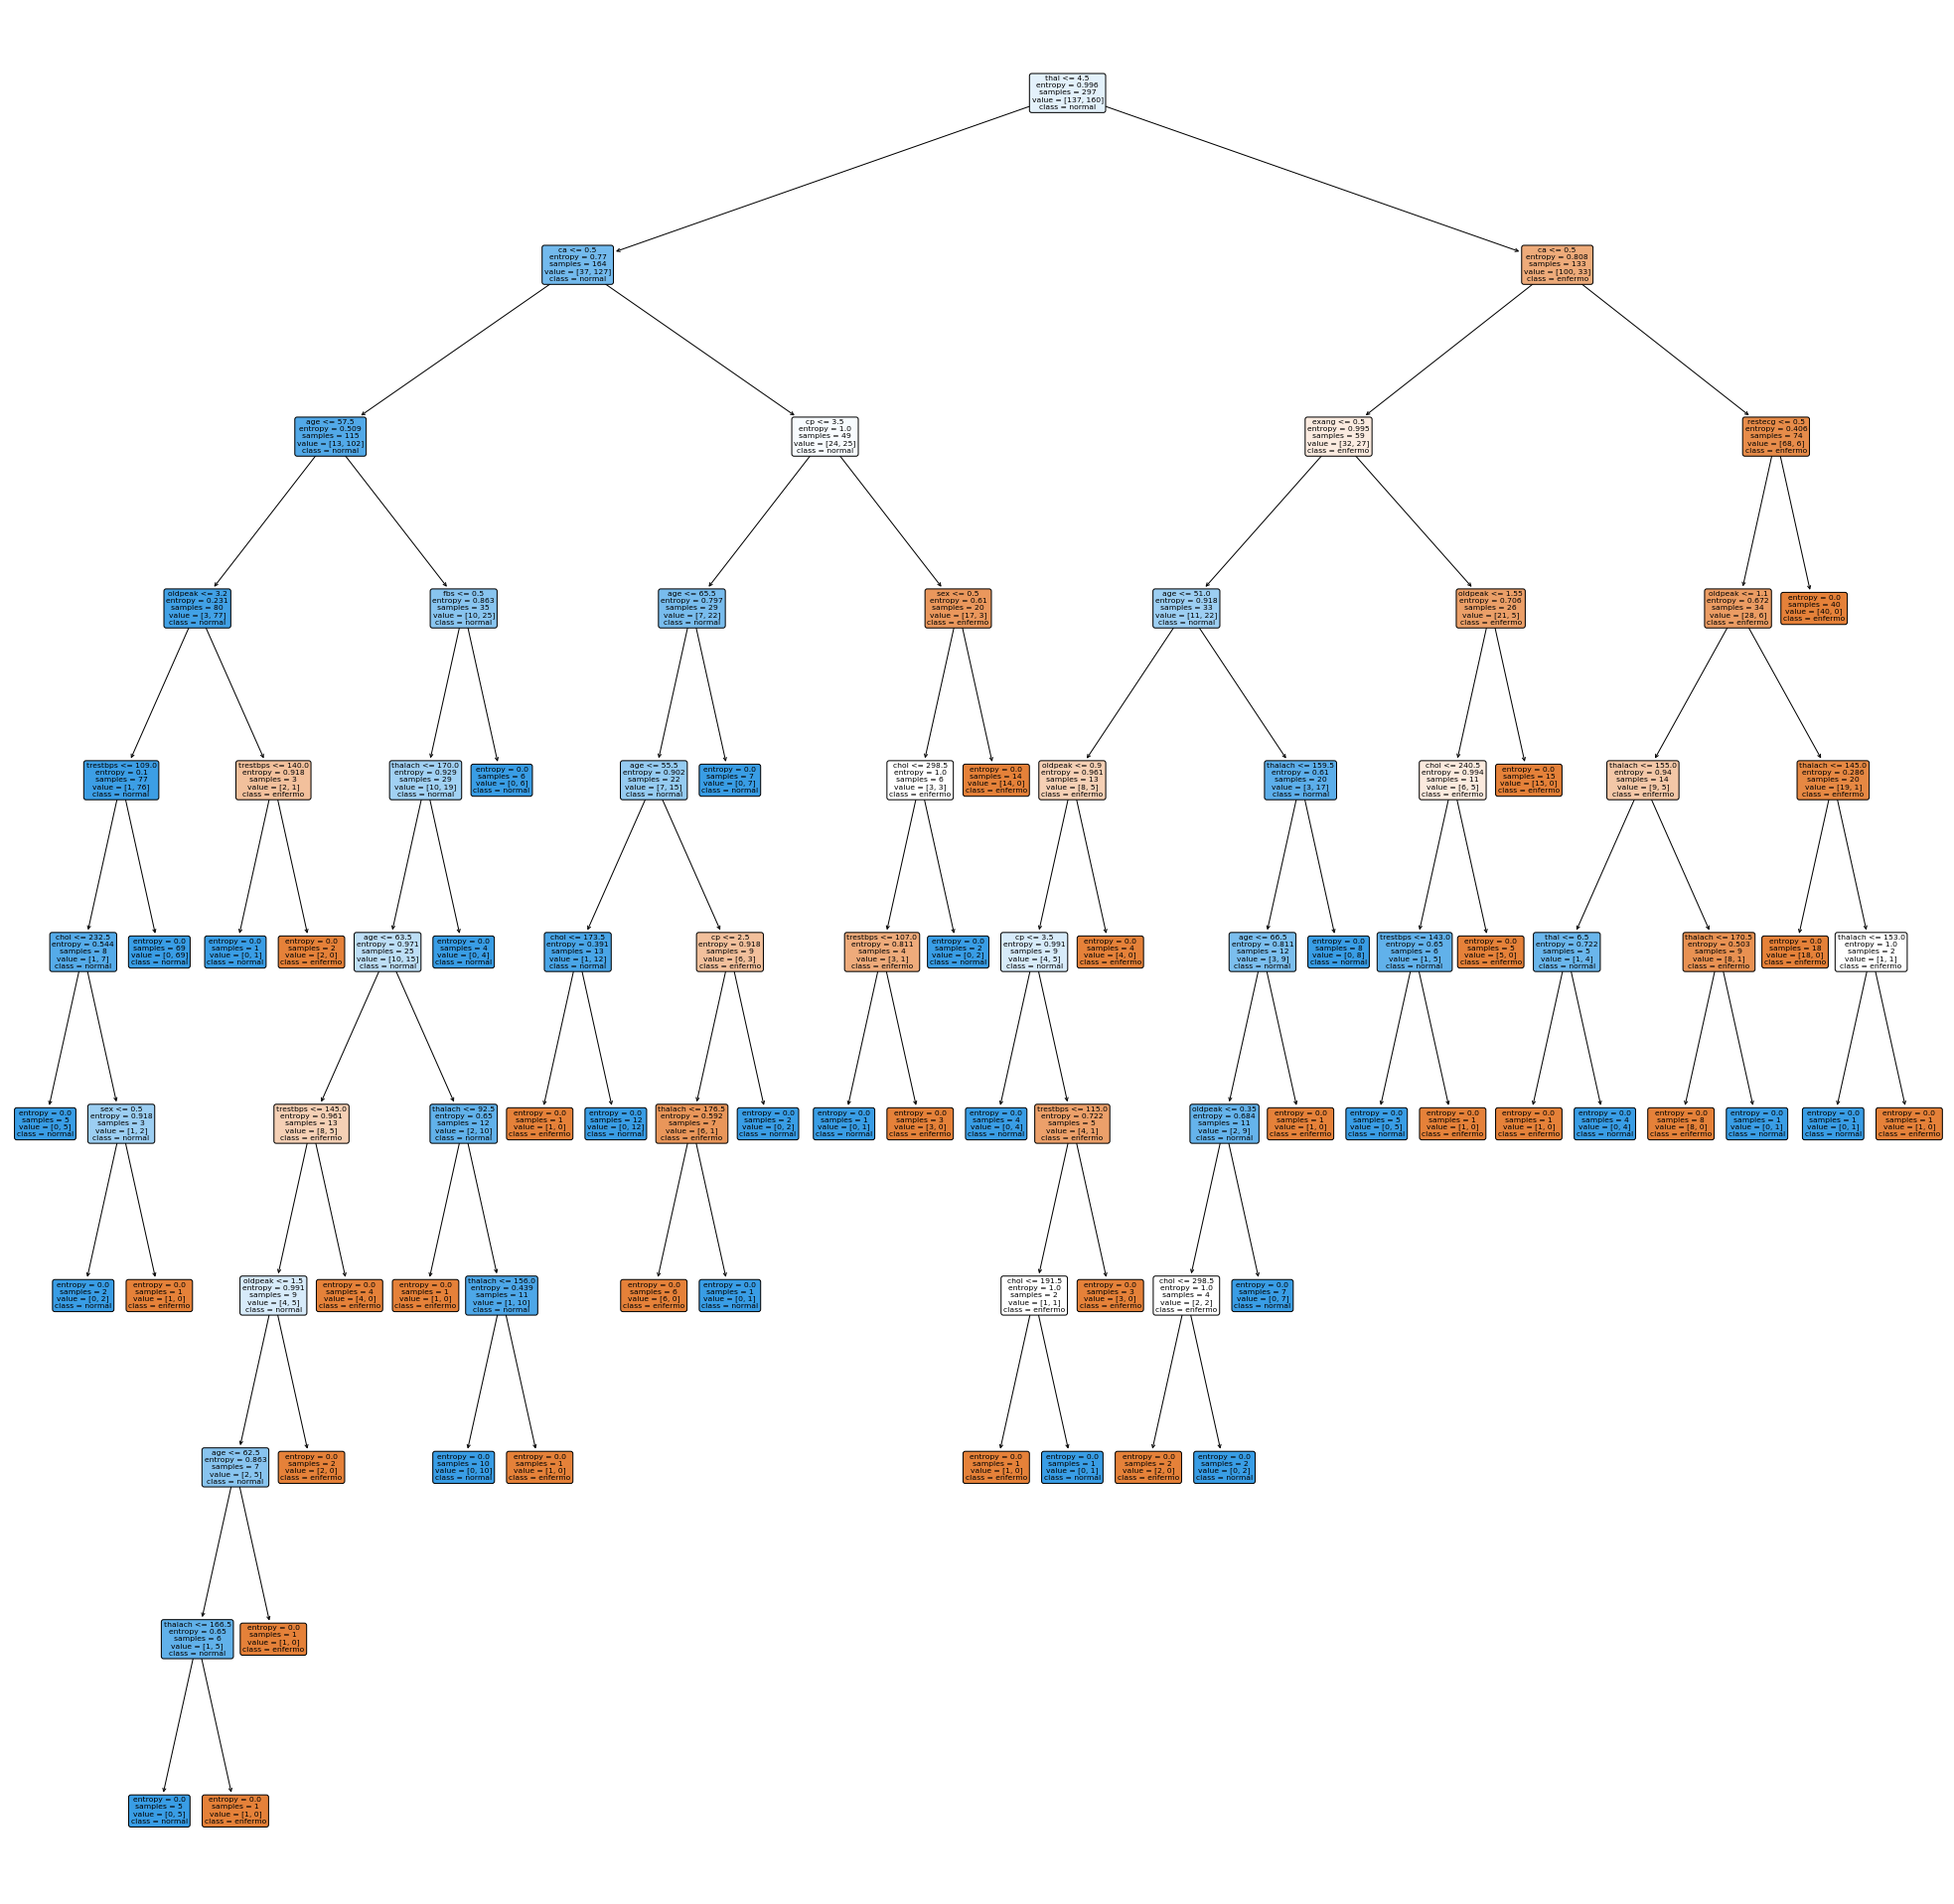

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(35,35))
plot_tree(clf, filled=True,feature_names= nombre_columnas, class_names= ['enfermo', 'normal'], rounded=True)
plt.show()

Como se puede observar, todas las hojas son homogéneas (tienen sólo ejemplos de una clase en cada una de ellas), clasificando perfectamente entre sanos y enfermos.

In [27]:
# Contruyo un monton de clasificadores
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np


train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 12)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy",
                                 max_depth=md,
                                 min_samples_split=2,
                                 random_state=RANDOM_STATE)
    
    scores = cross_validate(clf, X1, X2, 
                            scoring='accuracy',
                            cv=10,
                            return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265,
  0.9495066800827324,
  0.9712085639219632,
  0.9843032030856952,
  0.9940172731846386,
  0.9981329308513613,
  0.9996268656716417],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276,
  0.754367816091954,
  0.7677011494252873,
  0.7574712643678161,
  0.7573563218390804,
  0.747241379310345,
  0.747241379310345])

Observando los datos de cerca, la exactitud va mejorando en el conjunto de entrenamiento a medida que aumentamos la profundidad ya que los datos se van dividiendo mejor entre las dos clases y llega hasta el 0.99 cercano al 1 ya que separó todo como en el árbol de desición de arriba.

Pero en el conjunto de test esto no ocurre, a medida que sea aumenta la profundidad va mejorando la exactitud pero llega a un punto límite que es 0.79 y luego empeora. Esto es por el sobre-aprendizaje ya que el algoritmo se aprendió los datos perfectamente.

Viendo la seguida curva de aprendizaje, podemos determinar la profundidad máxima del árbol a usar para evitar este problema:

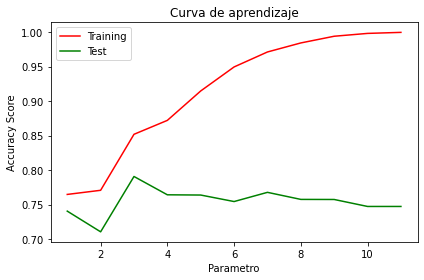

In [28]:
# Dibujo ambas:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

La profundidad máxima en el árbol será k=3 ya que es el valor máximo de exactitud (accuracy) que tiene el conjunto de datos del test. De esta manera evitamos el sobre-aprendizaje y clasificamos mejor entre enfermos y sanos si recibimos próximamente más datos.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

In [29]:
profundidad_MAX = 3

clf = DecisionTreeClassifier(criterion="entropy",
                             max_depth=profundidad_MAX,
                             min_samples_split=2,
                             random_state=RANDOM_STATE)

scores = cross_validate(clf, X1, X2, scoring='accuracy', cv=10, return_train_score=True)

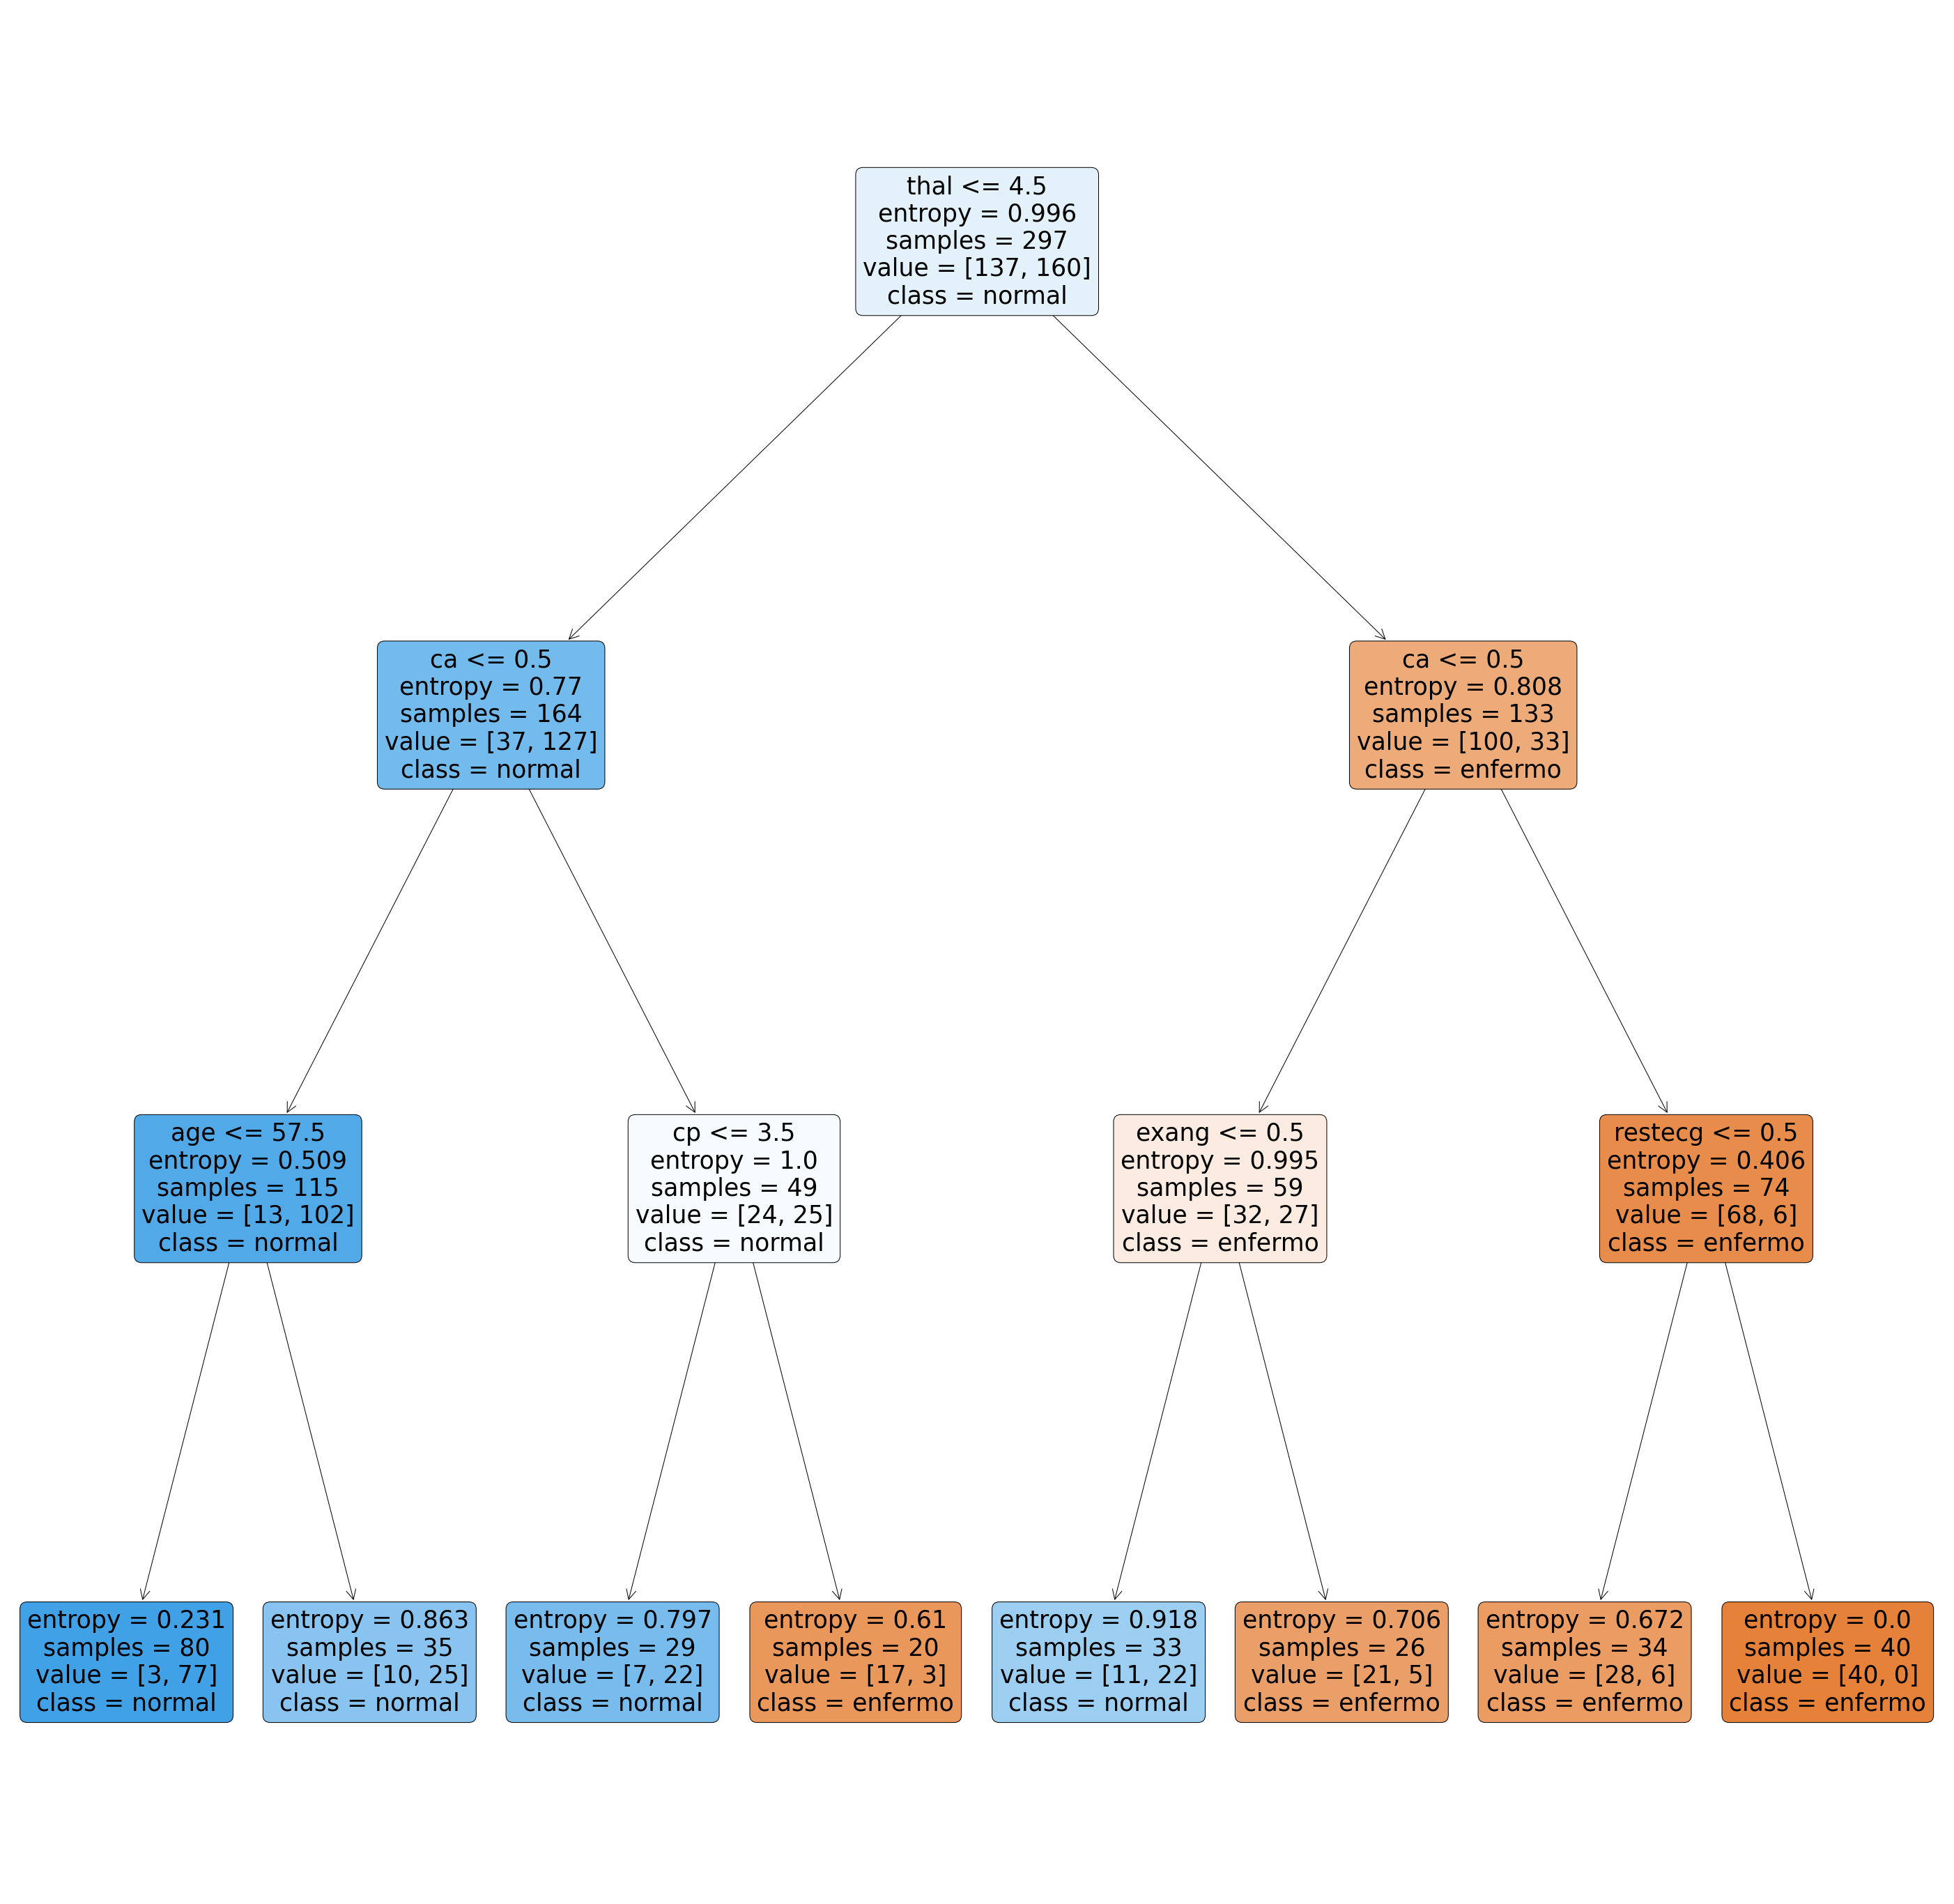

In [52]:
# Como en un árbol de decisión no hace falta escalar variables, dan igual las distancias
clf = clf.fit(X1, X2)

plt.figure(figsize=(50,50))
plot_tree(clf, filled=True,feature_names=nombre_columnas, class_names=  ['enfermo', 'normal'], rounded=True)
plt.show()

La primera variable usada para clasificar es `thal` y esta es una variable categórica causando el problema descrito en el anterior apartado. Por ello analizaremos entonces `ca`.

Como analizamos en el apartado 2, `ca` es la variable numérica más importante ya que además de contener una buena cantidad de datos para cada uno de los posibles valores que podía obtener. Utiliza a 0.5 como número de vasos principales coloreados para separar los datos en dos grupos. En la rama en la que son en su mayoría sanos, tomó un grupo de estos y "aprendió" que si tiene vasos principales coloreados, es que estos en general no estan tan sanos. Luego para la rama donde la mayoría estan enfermos, si no tiene vasos coloreados, es que no estan del todo enfermos. Pero en su gran mayoría, la tendencia es de que si una persona tiene los vasos principales coloreados, es que está enferma.

Uno de los mejores datos de correlación de pearson era `age-ca`, y por ello es comprensible que luego en la siguiente profundidad del árbol, sea una de las variables a ser usadas para clasificar las clases. Si la edad es menor a los 57.5 años, en su mayoría tienden a ser personas sanas. Algo que es fácilmente aceptado ya que se conoce que a mayor edad, mayores complicaciones y mayores problemas cardiovasculares tendrá una persona. Esta clasificación es bastante efectiva ya que la entropía se reduce de 0.5 a 0.231 en la rama más a la izquierda del árbol, tiendo solamente unos pocos enfermos en los datos que son menores de los 57 años.

Ahora si vemos las variables categóricas, la variable `thal` es difícil de analizar aunque podemos entender que las personas clasificadas con el defecto fijo o reversible, son en su gran mayoría enfermos. Reduciendo un poco la entropía en las dos ramas.

Luego, de que `ca` clasifique en la rama más a la derecha, el algoritmo observó que en este grupo de mayoría enfermos, todos aquellos que tienen alguna anomalía o hipertrofia, están enfermos, creando así una división con una hoja completamente homogénea de sólo enfermos (entropía = 0). Una cosa a tomar en cuenta es que no todos los enfermos tendrán este problema pero según el aprendizaje, todos aquellos con esta complicación están enfermos.

### Variables no usadas
- La variable categórica `slope` no fue usada ni para clasificar el árbol de desición completo que se observa en uno de los apartados anteriores. 
- En el árbol de desición de profundidad 3 no se usaron: sex, trestbps, chol, fbs, thalach, oldpeak y slope. Hay que tomar en cuenta que a pesar de que `age-thalach` obtuvo la mejor correlación de pearson, ninguna de las 2 variables fueron usadas para clasificar.


### Tasa de accuracy de profundidad 1:


Clasificó como normales/sanos a 164 personas, 127 estan sanos y 37 son efermos. En cuanto a enfermos, 133 fueron clasificados pero 100 son los realmente enfermos y 33 los sanos. Luego, para clase de normales hay 127 enfermos clasificados correctamente y 33 mal. Para los enfermos 100 clasificados bien y 37 mal.

Esto quiere decir que la tasa de exactitud o accuracy es:

<center>$TA = \frac{127 + 100}{297} = 0.764682206942814$</center>

Para ver si lo calculamos bien, lo comprobamos:

In [31]:
train_accuracy = []
test_accuracy = []

clf = DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_split=2, random_state=RANDOM_STATE)
scores = cross_validate(clf, X1, X2, scoring='accuracy', cv=10, return_train_score=True)
    
train_accuracy.append(np.mean(scores['train_score']))
train_accuracy

[0.764682206942814]

### Resto de análisis:

El árbol que construimos no es capaz de separar perfectamente las clases, pues muchas de las hojas tienen una entropía elevada y solo unas pocas, como las extremas del árbol, estan casi separadas ya que corresponden a aquellos individuos que ya se han clasificado 3 veces como sanos o 3 veces como enfermos 

El nodo hoja con mayor confusión es aquel de la entropía mayor, en este caso es la quinta hoja de izquierda a derecha con los sigientes valores:
- **Entropy:** 0.61
- **Samples:** 33
- **Value:** [11,22]
- **Class:** normal

Es aquel nodo que tiene una mayor cantidad de las dos clases, fue creado por aquellas personas con `thal>4.5` (defecto fijo o reversible), y fueron clasificados como enfermos. Luego el número de vasos principales coloreados era menor a 0.5 (que en realidad es que era 0) y esta división trató de separar a los enfermos de los sanos, enviando por esta rama un grupo bastante heterogéno de sanos y enfermos aumentando la entropía a 0.995. Finalmente clasificó si tuvo o no una angina inducida por ejercicio y esto volvía a dividir a los enfermos que en su mayoría si tenían esto pero la hoja que creó para los sanos posee algunos enfermos todavía. 

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [32]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
   ## classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### Calculamos exactitud con porfundidad máxima 3 

In [33]:
clf = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía como criterio
                             max_depth=3,          # profundidad máxima del árbol
                             min_samples_split=2,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=RANDOM_STATE)

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, X1, X2, scoring='accuracy', 
                        cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.8518516965733133, 0.7906896551724139)

Se escogió como profundidad máxima a 3 por el análisis hecho anteriormente y así obtener las mejores tasas de aciertos tanto para el grupo de entrenamiento como para el de test.

In [34]:
scores['train_score']

array([0.8576779 , 0.84644195, 0.85393258, 0.84269663, 0.85018727,
       0.85393258, 0.8576779 , 0.83955224, 0.86567164, 0.85074627])

Todos los valores similares entre sí, por lo cual es un conjunto de datos partido de manera equilibrada

In [35]:
scores['test_score']

array([0.8       , 0.83333333, 0.86666667, 0.9       , 0.83333333,
       0.8       , 0.66666667, 0.62068966, 0.75862069, 0.82758621])

En este caso, se puede observar que la 7ª y 8ª partición poseen un conjunto distinto de datos que causa que se reduzca la exhaustividad. Por ello es importante realizar la validación cruzada.

### Métricas detalladas:

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE) #construyo clasificador on parammetros optmos

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, X1, X2, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ', np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ', np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ', np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


In [37]:
print(scores['test_precision_weighted'])

[0.8037037  0.83408748 0.87222222 0.90222222 0.83408748 0.80714286
 0.67261905 0.7752235  0.76515426 0.83901996]


In [38]:
print(scores['test_recall_weighted'])

[0.8        0.83333333 0.86666667 0.9        0.83333333 0.8
 0.66666667 0.62068966 0.75862069 0.82758621]


In [39]:
print(scores['test_f1_weighted'])

[0.79819005 0.83277217 0.86546003 0.90011123 0.83277217 0.8
 0.66666667 0.53012563 0.75322339 0.82373099]


En general, tiene un buen balance entre la precisón y el recall, demostrado con un F1 del 78%. Es decir, es capaz de clasificar correctamente el 81% de los individuos y en general recupera el 79% de los individuos de las clases. 

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, X1, X2, cv=10)

# Informe por clases
cr = classification_report(X2,predictions ,target_names=['normal', 'enfermo'])
print(cr)

              precision    recall  f1-score   support

      normal       0.82      0.71      0.76       137
     enfermo       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [41]:
target_names=np.array(['enfermo', 'normal'])

Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


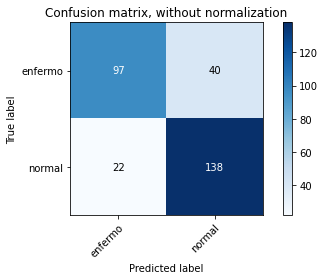

In [54]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(X2, predictions,target_names, normalize=False)

Esto quiere decir, que en el caso de:
- **Sanos/normal:** el 82% de las personas sanas recuperadas son relevantes, 82% fueron las predicciones correctas. En cuanto a el recall, el 71% fueron correctamente identificados, es decir, el algoritmo tiene una capacidad de detectar correctamente el 71% de los sanos entre los categorizados como sanos.
- **Enfermos:** el 78% de las personas enfermas fueron predicciones correctas y el 86% de los enfermos fueron correctamente detectados entre las predicciones.

Es decir, el modelo se equivocará el 18% de las veces cuando prediga que una persona está sana y un 22% cuando una persona está enferma. Por otro lado, 29% de los sanos no serán identificados como sanos y 14% de los enfermos no serán clasificados así.

F1 nos combina las dos medidas, por lo cual el algoritmo es mejor identificando quien está enfermo que una persona sana.

### Resumen
A pesar de tener unos buenos valores de precisión, recall y F1, en los sistemas de salud una clasificación mal hecha es muy delicada. Si se equivoca un 22% de las veces al clasificar erróneamente a una persona enferma, esto puede llevar un gran conjunto de problemas. No sólo puede escalar a daños severos a la salud del individuo si no que aquellos que estén clasificando a los pacientes de esta forma sin supervisar que los datos son correctos, estarían arriesgando la vida de muchas personas. Tendría que mejorarse mucho los valores para que clasifique mejor y no sea un problema para los médicos y pacientes ya que esto juega con sus vidas.

#### Ventajas
- Como sólo hay 2 grupos a clasificar, el árbol es fácil de entender. 
- La simplicidad y estructura del método es una de las mayores ventajas. Es simple y posee una estructura fácil de comprender. Podemos distinguir fácilmente qué decisión tomó en cada paso viendo el árbol. Por ejemplo, qué rango de valores toma para una variable para asignarlo a un grupo de personas que podríamos predecir que están enfermos, y el otro rango se inclina más hacia los sanos. Un médico o analista en un hospital podría fácilmente utilizar esta técnica para asistir y mejorar la calidad de sus servicios. 
- Trabajamos con variables numéricas y categóricas

#### Desventajas
- Si no está bien balanceado el conjunto de datos, crearía árboles sesgados difíciles de analizar. 
- En este problema los árboles de decisión no trabajan muy bien con las variables categóricas por lo que no podemos analizar tan bien como deberíamos el árbol.
- En algunos casos tenemos pocos datos para representar algunos rangos de las variables, es decir, la muestra es demasiado pequeña. Si esta información luego agregada a nuestra base de datos, quizás el árbol cambie en gran medida ya que podrían haber nuevos datos que separen mejor a los enfermos de los sanos. Esto podría verse como algo inestable si usamos estos datos y análisis en un hospital.
- Si se realiza incorrectamente el árbol podría haber un sobreaprendizaje y esto puede causar problemas graves si se usa en un hospital ya que la medicina es un servicio delicado y estaríamos realizando suposiciones inadecuadas.